<a href="https://colab.research.google.com/github/tjdiem/Math152/blob/main/Copy_of_P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [ ]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [ ]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [ ]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [ ]:
import numpy as np # First we have to load the package.

In [ ]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [ ]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [ ]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [ ]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [ ]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [ ]:
%timeit make_sq_1(1000)

10000 loops, best of 5: 120 µs per loop


In [ ]:
%timeit make_sq_2(1000)

10000 loops, best of 5: 93 µs per loop


In [ ]:
%timeit make_sq_3(1000)

10000 loops, best of 5: 76.7 µs per loop


In [ ]:
%timeit make_sq_4(1000)

The slowest run took 33.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.95 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

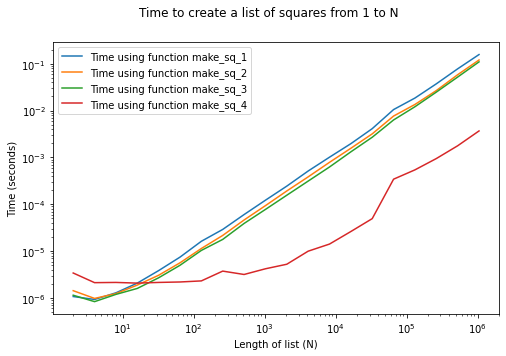

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

1. The function "make_sq_3" is the fastest method for short lists, while "make_sq_4" is the fastest for longer lists.  They take about the same time for lists of size 20.  

In [ ]:
#2
def make_sq_5(N):
  return np.square(np.arange(N))

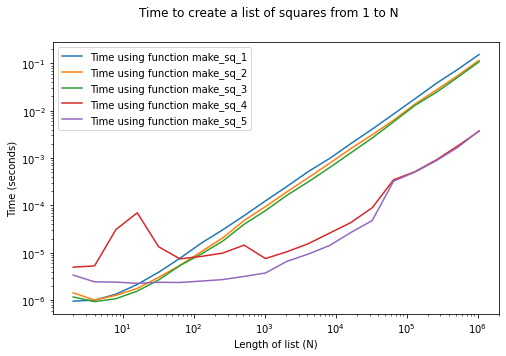

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4, make_sq_5]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

This method was slightly faster than "make_sq_4", making it the fastest function.  It resembled the "make_sq_4" graph because it also used numpy arrays instead of lists.

In [ ]:
#3
def inflate(S):
  for j, letter in enumerate(S):
    print(letter*(j+1), end='')

In [ ]:
inflate("Python")

Pyyttthhhhooooonnnnnn

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

## Challenge 1

If $N$ is a positive integer, then $r_3(N)$ is the number of ways that $N$ can be expressed as the sum of three squares.  Order and sign matter, so for example
$$6 = 1^2 + 1^2 + 2^2 = (-1)^2 + 1^2 + 2^2 = 2^2 + (-1)^2 + (-1)^2 = \cdots$$
These are all different ways of expressing 6 as the sum of three squares.  In fact, $r_3(6) = 8 \cdot 3 = 24$.  The 8 comes from the fact that there are eight sign-choices, and the 3 comes from the three orderings (1,1,2) and (1,2,1) and (2,1,1).

In other words, $r_3(N)$ is the number of elements in the following set:
$$\{ (a,b,c) \in {\mathbb Z}^3 : a^2 + b^2 + c^2 = N \}.$$

Write a function that computes $r_3(N)$ as efficiently as you can, for somewhat large values of $N$ (e.g., $N \approx 1000$).

You can check whether your function is behaving correctly, by comparing to the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875).




In [ ]:
def rep_three(N):
  n = int(N**0.5 //1)
  x = 0
  R = 0
  for a in range(n+1):
    for b in range(a+1):
      for c in range(b+1):
        if a**2 + b**2 + c**2 == N:
          x = 1 #x is the number of arrangements for each 3 integers
          if a != 0: #for each number that isn't 0, R gets multiplied by two since that number can be positive or negative
            x *= 2
          if b != 0:
            x *= 2
          if c != 0:
            x *= 2
          if a != b: #if just a and b aren't equal, there are 3 possible arrangements
            x *= 3
          if b != c: #if just b anc c aren't equal, there are 3 possible arrangements
            x *= 3
          if a != b and b != c: #if all three numbers aren't equal, there are 6 possible arrangements (not 9).
            x *= 2/3
          R += x #add up the arrangements for each set of integers
  return(int(R))



In [ ]:
rep_three(74)

120

In [ ]:
rep_three(6) # This should output 24.

24

# Challenge 2

If $r$ is a positive real number, then the area of the circle of radius $r$ is $\pi r^2$.  If you place this circle around the origin, on a sheet of graph paper, then you will find *about* $\pi r^2$ "grid points" inside this circle.  The grid points inside the circle form the set
$$S = \{ (x,y) \in {\mathbb Z}^2 : x^2 + y^2 < r^2 \}.$$

Define $E(r) = \pi r^2 - \# S$ to be the "error" -- the difference between the area of the circle and the number of grid points within the circle.  

Create a plot with $r$ on the horizontal axis and $E(r)$ on the y-axis.  Try to accomplish this as efficiently as possible, where $r$ ranges from $0$ to $1000$.

Can you come up with a good bound $\vert E(r) \vert \leq f(r)$ for some nice function $f(r)$, just by looking at your plot?  I.e., your plot of $E(r)$ should be bounded above by the graph of $y = f(r)$ and below by the graph of $y = -f(r)$.  If you can come up with such a bound, plot it too.

In [141]:
import matplotlib.pyplot as plt
from math import pi
from math import ceil
from math import log

In [177]:
def grid_points(radius):
  '''
  We calculate the number of points with x >= 0 and y > 0.  
  Then we multiply this by 4 to account for each of the four quadrants
  and add 1 to account for the origin. 
  '''
  counter = 0
  for x in range(radius): #this was my first attempt but was far too slow
    for y in range(1, radius):
      if x**2 + y**2 < radius**2:
        counter += 1
    S = 4*counter +1 
  return(S)

In [178]:
def grid_points1(radius):
  counter = 0
  for x in range(1, radius):
    y_values = ceil(np.sqrt(radius**2 - x**2))  #Here I calculated the number of y values that would fit in the circle for each x value (this includes y-values at the x-axis - hence the ceil fucntion).
    counter += y_values
  S = 4*counter +1 
  return(S)

In [ ]:
grid_points1(5)

69

In [ ]:
grid_points1(1000)

3141521

In [ ]:
Elist = list(pi*i**2 - grid_points1(i) for i in range(1, 1001))
print(Elist)

[2.141592653589793, 3.5663706143591725, 3.274333882308138, 5.26548245743669, 9.539816339744831, 4.097335529232552, 8.938040025899852, 8.06192982974676, 5.469004940773232, 9.159265358979326, 7.132711084364985, 15.389342116930209, 13.929158456675054, 6.752160103599408, 9.85834705770344, 11.247719318987038, 18.9202768874502, 12.876019763092927, 9.114947945915219, 11.637061435917303, 16.442360233098725, 7.530844337459939, 12.90251374900049, 20.557368467720835, 22.495408493620744, 14.716633826700217, 5.221044466959029, 14.008640414397632, 25.07942166901603, 18.43338823081376, 22.070540099791288, 11.99087727594815, 16.194399759284806, 18.6811075498008, 7.451000647496585, 22.504079052371708, 19.840342764427078, 27.459791783660876, 13.36242611007492, 13.548245743669213, 32.01725068444193, 20.7694409323949, 23.804816487527205, 9.123377349839757, 12.725123519330737, 26.610054996001963, 22.778171779853437, 29.22947387088334, 21.96396126909349, 28.981633974482975, 10.282491987051799, 9.86653530680

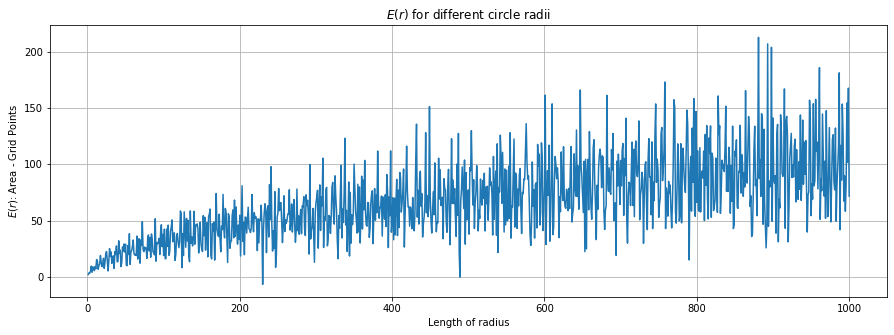

In [179]:
xlist = np.arange(1, 1001)
plt.figure(figsize=(15,5))
plt.plot(xlist, Elist) 
plt.grid()
plt.xlabel('Length of radius')
plt.ylabel('$E(r)$: Area - Grid Points')
plt.title('$E(r)$ for different circle radii')
plt.show()

It was hard to come up with good boundaries just by looking at the graph.  In terms of an upper bound, the graph seemed to somewhat resemble a square root function.  I messed around with graphs of the form $E(r) = k\sqrt{r}$ until I found a $k$ value that I was satisfied with.  I also noticed that the function $E(r)$ hardly had any values below 0.  This made it easier to come up with a lower bound.

In [161]:
upper_bound = list(7.2*np.sqrt(i) for i in range(1,1001))

In [ ]:
for i in range(1, 1000): #print the only negative values
  if pi*i**2 - grid_points1(i) < 0:
    print(i, pi*i**2 - grid_points1(i))

230 -6.748625099950004
489 -0.22308095509652048


In [175]:
lower_bound = 1000*[-6.75]

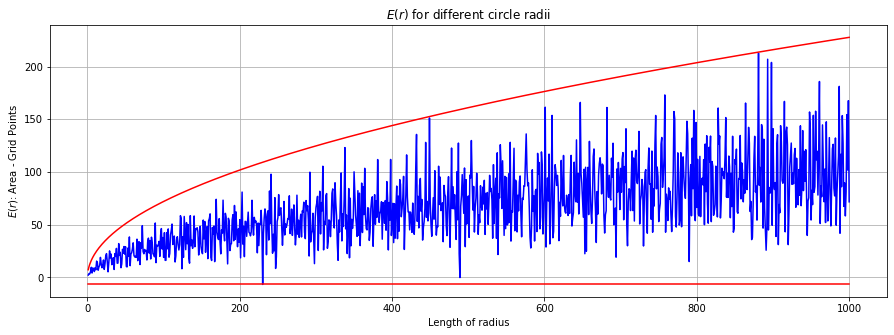

In [176]:
xlist = np.arange(1, 1001)
plt.figure(figsize=(15,5))
plt.plot(xlist, Elist, color = 'blue', label="E(r)") 
plt.plot(xlist, upper_bound, color = 'red')
plt.plot(xlist, lower_bound, color = 'red')
plt.grid()
plt.xlabel('Length of radius')
plt.ylabel('$E(r)$: Area - Grid Points')
plt.title('$E(r)$ for different circle radii')
plt.show()